<a href="https://colab.research.google.com/github/iris10130901/AI_Project/blob/main/R%E8%AA%9E%E8%A8%80_%E8%B3%87%E6%96%99%E9%9B%86%E7%BE%A4_Clustering_Kmeans_%E5%88%86%E9%A1%9E_%E4%B9%B3%E8%85%BA%E7%99%8C(Breast_Cancer_Diagnostic)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.分類(Classification):分類模型使用一個或多個輸入的值來預測一個或多個輸出目標的值。
分類模型可幫助組織預測已知的結果,例如顧客是否購買、流失,腫瘤的判定是良性、惡性。

一. 建立分類模型的步驟
本範例檔wisc_bc_data.csv是乳腺癌(Breast Cancer Diagnostic)的診斷資料
取自美國加州大學歐文分校的機 械學習資料庫,
於可疑的乳腺腫塊使用細針穿刺的技術 (Fine Needle Aspirate, FNA)蒐集數位化圖像
並加以計算,欄位共32項,觀測值569筆。說明如下:
- 第1欄:識別號碼(ID number):識別號碼
- 第2欄:診斷結果(Diagnosis):惡性(M = malignant)、良性(B = benign)
- 第3...32欄:C1 、C2...C30這30項資料全部都是計算每一個細胞核的真實資料測量值,包含半徑、紋 理、周長、範圍、平滑度、緊密度、凹陷部分的程度、凹陷部分的數量、對稱度、碎型維度等。

資料探勘的過程大致分為3個步驟如下:

 1. 讀入資料和資料準備:

- 首先將資料檔wisc_bc_data.csv讀到一個框架(data frame)變數,然後去除遺漏值和不需要的資料(譬如第一欄的資料id),並將資料以70%和30%的比例分割成訓練組(train partition)和測試組(testing partition)。

In [ ]:
wdbc <- read.csv("https://raw.githubusercontent.com/shreyaskhadse/data_files/master/wisc_bc_data.csv?fbclid=IwAR3035K8QJxiJQ-6myHnuq8OjEsukLun53zLJCNaW39-7RZARneJ3V3ccgY", stringsAsFactors = FALSE) # select wisc_bc_data.csv
wdbc

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87139402,B,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,⋯,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
8910251,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,⋯,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
905520,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,⋯,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
868871,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,⋯,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
9012568,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,⋯,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
906539,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,⋯,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,⋯,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
87880,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,⋯,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
862989,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,⋯,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552


# 1. 讀入資料和資料準備

- 首先將資料檔wisc_bc_data.csv讀到一個框架(data frame)變數,然後去除遺漏值和不需要的資料(譬如第一欄的資料id),並將資料以70%和30%的比例分割成訓練組(train partition)和測試組(testing partition)。
- rm(list = ls())
- wdbc <- read.csv(file.choose(), stringsAsFactors = FALSE) # select wisc_bc_data.csv

In [ ]:
sum(is.na(wdbc))       #沒有遺漏值

[1] 0

In [ ]:
wdbc=na.exclude(wdbc)

In [ ]:
dim(wdbc)

[1] 569  32

# 去除第一個欄位ID編碼

In [ ]:
wdbc=wdbc[,-1]
dim(wdbc)

[1] 569  31

In [ ]:
names(wdbc)

[1] "diagnosis"         "radius_mean"       "texture_mean"     
 [4] "perimeter_mean"    "area_mean"         "smoothness_mean"  
 [7] "compactness_mean"  "concavity_mean"    "points_mean"      
[10] "symmetry_mean"     "dimension_mean"    "radius_se"        
[13] "texture_se"        "perimeter_se"      "area_se"          
[16] "smoothness_se"     "compactness_se"    "concavity_se"     
[19] "points_se"         "symmetry_se"       "dimension_se"     
[22] "radius_worst"      "texture_worst"     "perimeter_worst"  
[25] "area_worst"        "smoothness_worst"  "compactness_worst"
[28] "concavity_worst"   "points_worst"      "symmetry_worst"   
[31] "dimension_worst"

In [ ]:
#建一個中文欄位的資料集
wdbcC <- wdbc

In [ ]:
wdbc$diagnosis <- factor(wdbc$diagnosis, levels = c("B", "M"), 
                         labels = c("Benign", "Malignant")) 

In [ ]:
wdbc$diagnosis

[1] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
  [8] Malignant Benign    Benign    Malignant Benign    Benign    Benign   
 [15] Malignant Benign    Benign    Benign    Malignant Benign    Benign   
 [22] Benign    Benign    Benign    Benign    Malignant Benign    Malignant
 [29] Benign    Benign    Benign    Malignant Malignant Benign    Benign   
 [36] Benign    Malignant Benign    Malignant Malignant Malignant Malignant
 [43] Malignant Benign    Benign    Malignant Benign    Malignant Benign   
 [50] Benign    Malignant Benign    Benign    Benign    Malignant Benign   
 [57] Benign    Benign    Malignant Malignant Malignant Malignant Malignant
 [64] Malignant Malignant Benign    Benign    Benign    Benign    Benign   
 [71] Malignant Benign    Benign    Benign    Benign    Benign    Malignant
 [78] Benign    Benign    Malignant Benign    Benign    Benign    Benign   
 [85] Benign    Benign    Benign    Benign    Malignant Benign    Benign   
 [92] Benign    Malignant Benign    Malignant Malignant Benign    Benign   
 [99] Benign    Malignant Benign    Benign    Benign    Malignant Benign   
[106] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
[113] Malignant Malignant Benign    Malignant Malignant Malignant Malignant
[120] Benign    Benign    Malignant Benign    Malignant Benign    Benign   
[127] Malignant Malignant Malignant Malignant Malignant Benign    Benign   
[134] Malignant Benign    Malignant Benign    Benign    Malignant Benign   
[141] Malignant Malignant Malignant Malignant Malignant Benign    Malignant
[148] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
[155] Benign    Benign    Benign    Malignant Benign    Benign    Benign   
[162] Benign    Benign    Benign    Malignant Malignant Benign    Malignant
[169] Benign    Benign    Malignant Malignant Malignant Benign    Malignant
[176] Benign    Malignant Benign    Malignant Benign    Benign    Malignant
[183] Benign    Malignant Benign    Benign    Malignant Malignant Malignant
[190] Benign    Malignant Benign    Benign    Malignant Malignant Malignant
[197] Malignant Benign    Benign    Benign    Malignant Benign    Benign   
[204] Benign    Benign    Malignant Benign    Malignant Benign    Malignant
[211] Benign    Malignant Malignant Benign    Benign    Benign    Benign   
[218] Benign    Malignant Malignant Benign    Benign    Malignant Benign   
[225] Benign    Benign    Benign    Malignant Malignant Benign    Benign   
[232] Benign    Benign    Malignant Benign    Benign    Malignant Benign   
[239] Benign    Benign    Malignant Benign    Benign    Malignant Malignant
[246] Benign    Benign    Benign    Benign    Benign    Benign    Malignant
[253] Benign    Malignant Benign    Benign    Benign    Benign    Benign   
[260] Benign    Benign    Benign    Malignant Benign    Malignant Malignant
[267] Benign    Benign    Benign    Malignant Benign    Malignant Benign   
[274] Benign    Malignant Malignant Benign    Malignant Benign    Benign   
[281] Malignant Benign    Benign    Benign    Malignant Benign    Malignant
[288] Malignant Malignant Benign    Benign    Benign    Malignant Benign   
[295] Malignant Malignant Malignant Malignant Benign    Malignant Malignant
[302] Benign    Benign    Malignant Malignant Malignant Malignant Benign   
[309] Benign    Benign    Malignant Malignant Benign    Benign    Malignant
[316] Benign    Malignant Malignant Benign    Benign    Benign    Malignant
[323] Malignant Benign    Benign    Malignant Benign    Malignant Benign   
[330] Malignant Benign    Benign    Benign    Benign    Malignant Benign   
[337] Benign    Benign    Malignant Benign    Benign    Malignant Malignant
[344] Benign    Malignant Benign    Benign    Benign    Malignant Benign   
[351] Benign    Malignant Benign    Benign    Malignant Benign    Benign   
[358] Benign    Malignant Benign    Malignant Malignant Benign    Benign   
[365] Benign    Benign    Malignant Benign    Beni

In [ ]:
wdbcC$diagnosis <- factor(wdbc$diagnosis, levels = c("Benign", "Malignant"), 
                         labels = c("良性", "惡性")) 

In [ ]:
wdbcC

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,良性,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,⋯,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
2,良性,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,⋯,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
3,良性,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,⋯,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
4,良性,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,⋯,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
5,良性,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,⋯,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
6,良性,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,⋯,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
7,良性,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,⋯,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
8,惡性,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,0.2251,⋯,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
9,良性,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,⋯,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552


診斷結果(Diagnosis):惡性(M = malignant)、良性(B = benign)

#建立訓練與測試集01: 30:70

In [ ]:
#建立訓練與測試集01: 30:70
# test.index sampling 30% as testing group, remaining 70% as train group 
n = 0.3 * nrow(wdbc)
test.index = sample(1:nrow(wdbc), n)
wdbc.train = wdbc[-test.index, ]
wdbc.test = wdbc[test.index, ]

In [ ]:
nC = 0.3 * nrow(wdbcC)
test.indexC = sample(1:nrow(wdbcC), nC)
wdbc.trainC = wdbc[-test.indexC, ]
wdbc.testC = wdbc[test.indexC, ]

# 2. 建立模型並輸出決策樹 -----
這個步驟我們要安裝載入所需套件(packages),執行建立模型的函數,輸出決策樹圖形。在這裡我們先 試試tree套件的tree函數。

In [ ]:
install.packages("tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tree)

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 399 520.700 Benign ( 0.641604 0.358396 )  
   2) perimeter_worst < 106.1 247  89.960 Benign ( 0.955466 0.044534 )  
     4) points_worst < 0.1456 238  48.520 Benign ( 0.978992 0.021008 )  
       8) area_se < 33.005 221  22.800 Benign ( 0.990950 0.009050 )  
        16) texture_worst < 29.985 188   0.000 Benign ( 1.000000 0.000000 ) *
        17) texture_worst > 29.985 33  15.090 Benign ( 0.939394 0.060606 )  
          34) compactness_se < 0.012025 7   8.376 Benign ( 0.714286 0.285714 ) *
          35) compactness_se > 0.012025 26   0.000 Benign ( 1.000000 0.000000 ) *
       9) area_se > 33.005 17  15.840 Benign ( 0.823529 0.176471 )  
        18) dimension_se < 0.002882 5   6.730 Malignant ( 0.400000 0.600000 ) *
        19) dimension_se > 0.002882 12   0.000 Benign ( 1.000000 0.000000 ) *
     5) points_worst > 0.1456 9  11.460 Malignant ( 0.333333 0.666667 ) *
   3) perimeter_worst > 106.1 152 118.400


Classification tree:
tree(formula = diagnosis ~ ., data = wdbc.train)
Variables actually used in tree construction:
[1] "perimeter_worst" "points_worst"    "area_se"         "texture_worst"  
[5] "compactness_se"  "dimension_se"    "radius_worst"    "points_mean"    
[9] "texture_mean"   
Number of terminal nodes:  12 
Residual mean deviance:  0.115 = 44.51 / 387 
Misclassification error rate: 0.02506 = 10 / 399 

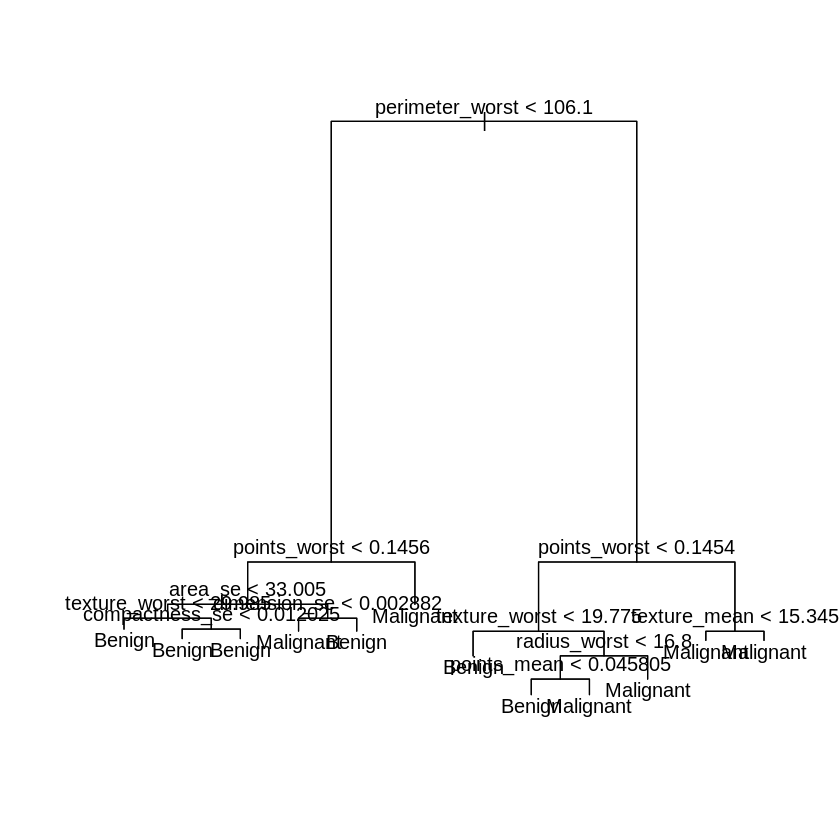

In [ ]:
wdbc.tree = tree(diagnosis ~ .,data = wdbc.train)  #  diagnosis 須為因子變數
wdbc.tree
summary(wdbc.tree)
plot(wdbc.tree)
text(wdbc.tree)

# 2.1 使用package套件 rpart 建立決策樹

In [ ]:
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
myFormula <- diagnosis ~ .
wdbc_rpart <- rpart(myFormula, data = wdbc.train,
                    control = rpart.control(minsplit = 10))

## 決策樹視覺化- 2. rpart有專屬的繪圖套件rpart.plot，函式是prp() 

In [ ]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
require(rpart.plot)

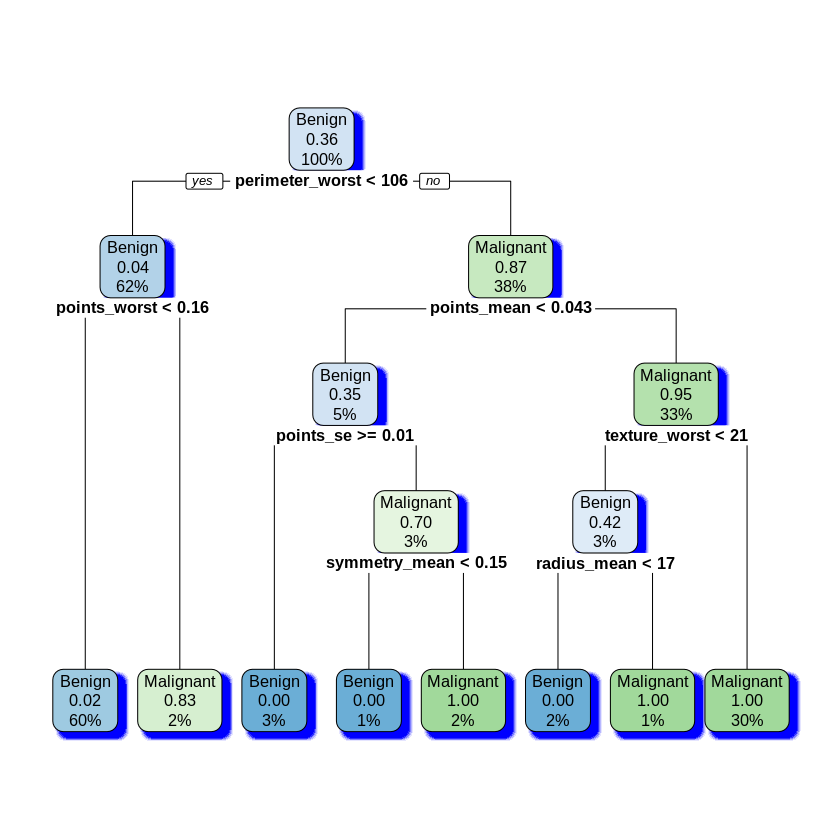

In [ ]:
rpart.plot(wdbc_rpart,
           type=2, extra="auto",
           under=FALSE, fallen.leaves=TRUE,
           digits=2, varlen=0, faclen=0,
           cex=NULL, tweak=1,
           snip=FALSE,
           box.palette="auto", shadow.col= "blue")

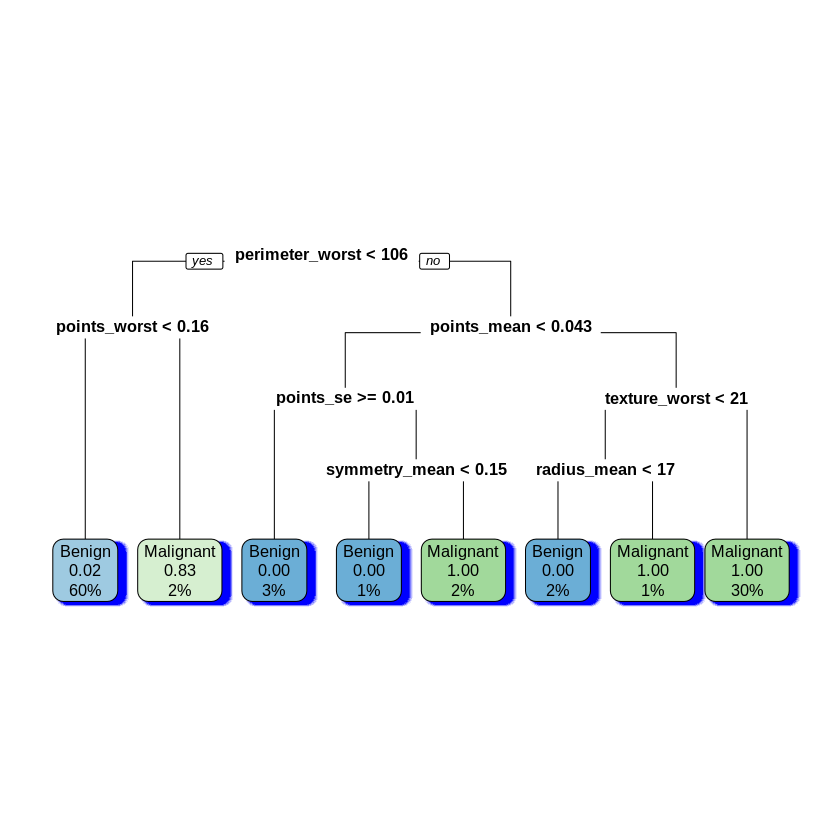

In [ ]:
rpart.plot(wdbc_rpart,
           type=0, extra="auto",
           under=FALSE, fallen.leaves=TRUE,
           digits=2, varlen=0, faclen=3,
           cex=NULL, tweak=1,
           snip=FALSE,
           box.palette="auto", shadow.col= "blue")

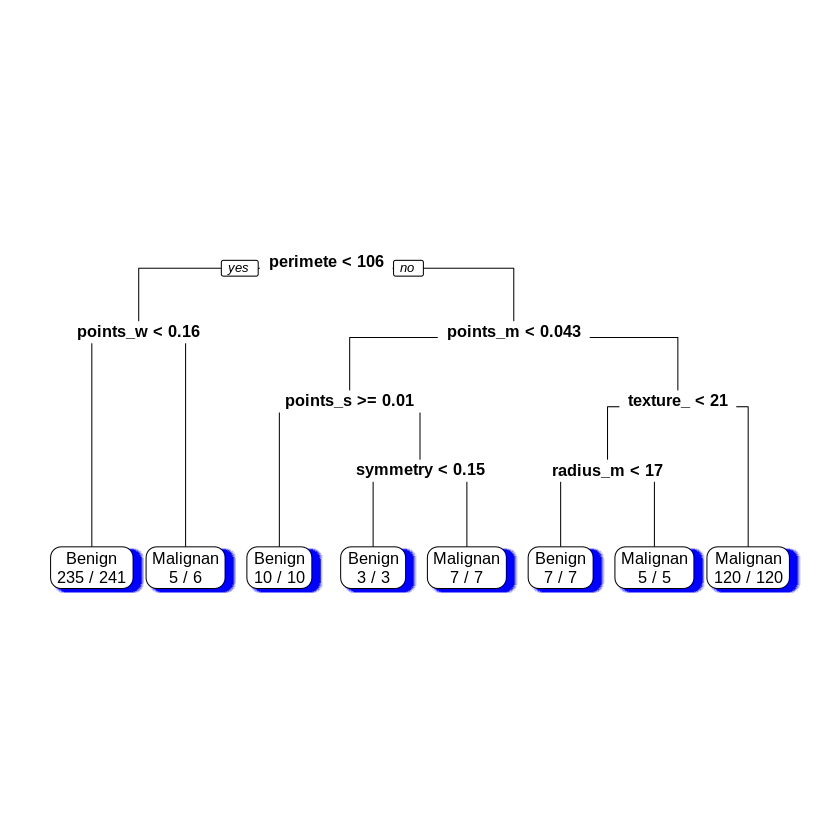

In [ ]:
prp(wdbc_rpart,           # 模型
    faclen = 1,           # 呈現的變數不要縮寫
    fallen.leaves = TRUE, # 讓樹枝以垂直方式呈現
    shadow.col="blue",  # 最下面的節點塗上陰影
    # number of correct classifications / number of observations in that node
    extra = 2)  


## 決策樹視覺化- 3. rattle 套件 fancyRpartPlot 

In [ ]:
install.packages("rattle")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rattle)

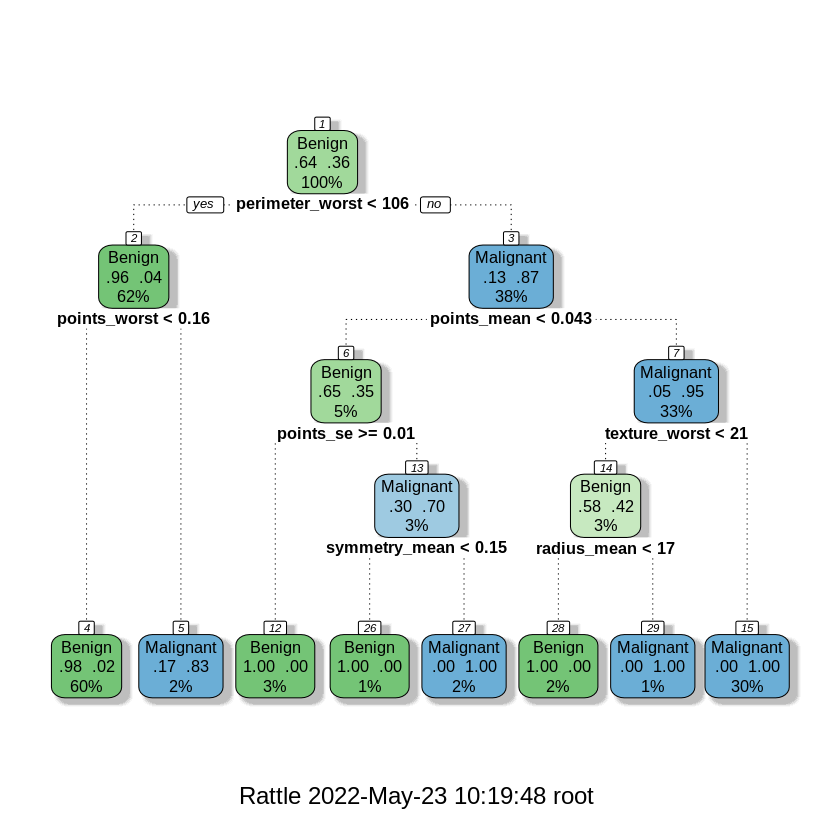

In [ ]:
fancyRpartPlot(wdbc_rpart)

In [ ]:
# 至於輸出成規則，用rattle程序包裡面的asRules函數：
asRules(wdbc_rpart)


 Rule number: 15 [diagnosis=Malignant cover=120 (30%) prob=1.00]
   perimeter_worst>=106.1
   points_mean>=0.04279
   texture_worst>=20.64

 Rule number: 29 [diagnosis=Malignant cover=5 (1%) prob=1.00]
   perimeter_worst>=106.1
   points_mean>=0.04279
   texture_worst< 20.64
   radius_mean>=16.94

 Rule number: 27 [diagnosis=Malignant cover=7 (2%) prob=1.00]
   perimeter_worst>=106.1
   points_mean< 0.04279
   points_se< 0.01006
   symmetry_mean>=0.151

 Rule number: 5 [diagnosis=Malignant cover=6 (2%) prob=0.83]
   perimeter_worst< 106.1
   points_worst>=0.1581

 Rule number: 4 [diagnosis=Benign cover=241 (60%) prob=0.02]
   perimeter_worst< 106.1
   points_worst< 0.1581

 Rule number: 28 [diagnosis=Benign cover=7 (2%) prob=0.00]
   perimeter_worst>=106.1
   points_mean>=0.04279
   texture_worst< 20.64
   radius_mean< 16.94

 Rule number: 26 [diagnosis=Benign cover=3 (1%) prob=0.00]
   perimeter_worst>=106.1
   points_mean< 0.04279
   points_se< 0.01006
   symmetry_mean< 0.151

 Rule

In [ ]:
# 3. 結果分析
# 我們將在這個步驟產生訓練組和測試組的混淆矩陣,以及計算預測的正確率。
#train confusion matrix
diagnosis.train=wdbc$diagnosis[-test.index]
train.pred=predict(wdbc.tree,newdata= wdbc.train, type='class') 
(table.train=table(diagnosis.train,train.pred))

               train.pred
diagnosis.train Benign Malignant
      Benign       248         8
      Malignant      2       141

In [ ]:
cat("Total records(train)=",nrow(wdbc.train), "\n")
# Total records(train)= 399

Total records(train)= 399 


In [ ]:
cat("Correct Classification Ratio(train)=", sum(diag(table.train))/sum(table.train)*100,"%\n")
# Correct Classification Ratio(train)= 97.99499 %

Correct Classification Ratio(train)= 97.49373 %


In [ ]:
#test confusion matrix
diagnosis.test=wdbc$diagnosis[test.index] 
test.pred=predict(wdbc.tree,newdata=wdbc.test, type='class') 
(table.test=table(diagnosis.test,test.pred))

              test.pred
diagnosis.test Benign Malignant
     Benign        93         8
     Malignant      2        67

In [ ]:
cat("Total records(test)=",nrow(wdbc.test),"\n")
#Total records(test)= 170 
cat("Correct Classification Ratio(test)=", sum(diag(table.test))/sum(table.test)*100,"%\n")

Total records(test)= 170 
Correct Classification Ratio(test)= 94.11765 %


最後輸出訓練組和測試組的混淆矩陣和正確率分析結果,我們可看到訓練組隨機抽出的7成資料(399筆) 中,原本診斷為良性,而使用tree模型,也被分類為良性的有257筆;原本診斷為惡性,而使用tree模 型,也被分類為惡性的有139筆,只有3筆分類錯誤,正確率高達99.248%。測試組隨機抽出的3成資料 (170筆)中,原本診斷為良性,而使用tree模型,也被分類為良性的有97筆;原本診斷為惡性,而使用 tree模型,也被分類為惡性的有63筆,只有10筆分類錯誤,正確率也高達94.118%。

# K-Means

In [ ]:
names(wdbc)

[1] "diagnosis"         "radius_mean"       "texture_mean"     
 [4] "perimeter_mean"    "area_mean"         "smoothness_mean"  
 [7] "compactness_mean"  "concavity_mean"    "points_mean"      
[10] "symmetry_mean"     "dimension_mean"    "radius_se"        
[13] "texture_se"        "perimeter_se"      "area_se"          
[16] "smoothness_se"     "compactness_se"    "concavity_se"     
[19] "points_se"         "symmetry_se"       "dimension_se"     
[22] "radius_worst"      "texture_worst"     "perimeter_worst"  
[25] "area_worst"        "smoothness_worst"  "compactness_worst"
[28] "concavity_worst"   "points_worst"      "symmetry_worst"   
[31] "dimension_worst"

In [ ]:
# 首先，我們從數據中刪除 diagnosis 進行分類。 why?
wdbc$diagnosis <- NULL

In [ ]:
wdbc

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,0.05955,⋯,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
2,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,0.06491,⋯,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
3,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,0.06340,⋯,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
4,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,0.06072,⋯,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
5,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,0.05544,⋯,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
6,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,⋯,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
7,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,⋯,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
8,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,0.2251,0.07421,⋯,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
9,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,0.06481,⋯,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552


In [ ]:
#預測分群結果與叢集中心
(kmeans.result <- kmeans(wdbc, 2))

K-means clustering with 2 clusters of sizes 438, 131

Cluster means:
  radius_mean texture_mean perimeter_mean area_mean smoothness_mean
1    12.55630     18.57037       81.12347  496.0619       0.0948845
2    19.37992     21.69458      128.23130 1185.9298       0.1012946
  compactness_mean concavity_mean points_mean symmetry_mean dimension_mean
1       0.09109982     0.06243776  0.03343254     0.1780580     0.06345402
2       0.14861298     0.17693947  0.10069878     0.1915397     0.06060290
  radius_se texture_se perimeter_se  area_se smoothness_se compactness_se
1 0.3041909   1.215153     2.152881 23.78529   0.007173263     0.02347469
2 0.7428038   1.222538     5.250580 95.67817   0.006598687     0.03217669
  concavity_se  points_se symmetry_se dimension_se radius_worst texture_worst
1   0.02874551 0.01063632  0.02061358  0.003747503     14.04390      24.70954
2   0.04241977 0.01567398  0.02030397  0.003953389     23.70947      28.91267
  perimeter_worst area_worst smoothness_worst 

In [ ]:
names(kmeans.result)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [ ]:
kmeans.result$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   2   1   1   1   2   1   1   1   2   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   2   1   1   1   1   2   1   1   1   2   1   2   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   1   1   2   1   2   1   1   1   1   1   1   2   1   1   1   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   1   1   1   1   1   1   1   1   1   1   1   2   1   1   2   1   1   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   2   1   2   2   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   2   1   2   1   1   1   1   2   1   1   1   1   2   1   2   1   1   2   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  2   2   2   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   1   2   2   1   2   1   1   1   1   1   1   1   1   2   1   2   1 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  1   2   1   1   1   1   2   2   2   1   2   1   1   1   2   2   1   1   1   1 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  1   1   1   1   1   1   1   1   1   2   1   1   2   1   1   1   1   1   1   2 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  1   1   2   1   1   1   1   2   2   1   1   1   1   1   1   1   1   1   1   1 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  1   1   1   2   2   1   1   1   1   1   1   2   1   2   1   1   1   1   1   1 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  1   1   1   1   2   1   1   1   1   2   1   2   1   1   2   2   1   1   1   1 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  2   1   1   1   2   1   1   2   2   1   1   1   1   1   2   2   2   2   1   1 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  2   1   1   1   1   2   1   1   1   1   2   2   1   1   1   1   2   2   1   1 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  1   2   2   1   1   2   1   2   1   2   1   1   1   1   1   1   1   1   2   1 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  1   2   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   2   1 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  2   1   1   1   1   1   2   1   1   2   1   1   1   1   1   1   1   1   1   1 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  1   1   1   2   1   1   2   1   1   1   2   1   1   2   1   1   1   1   2   1 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  1   1   2   2   1   2   1   1   1   1   1   1   1   1   1   2   1   1   2   1 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  1   1   1   1   1   1   1   1   1   1   1   2   1   2   1   1   2   1   1   1 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  1   1   1   1   2   1   1   1   1   2   1   1   2   1   1   1   1   2   1   1 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  2   2   1   1   2   1   1   2   1   1   1   1   1   2   1   2   1   2   1   1 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  1   1   2   1   1   1   1   2  

In [ ]:
# 然後將聚類結果與品種（Species）進行比較以檢查是否相似對像被分組在一起。
table(wdbcC$diagnosis, kmeans.result$cluster)

      
         1   2
  良性 356   1
  惡性  82 130

## 準確率為 85.41%

In [ ]:
cluster <- kmeans.result$cluster
cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   2   1   1   1   2   1   1   1   2   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   2   1   1   1   1   2   1   1   1   2   1   2   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   1   1   2   1   2   1   1   1   1   1   1   2   1   1   1   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   1   1   1   1   1   1   1   1   1   1   1   2   1   1   2   1   1   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   1   1   1   1   1   1   1   1   1   1   1   2   1   1   2   1   2   2   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   2   1   2   1   1   1   1   2   1   1   1   1   2   1   2   1   1   2   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  2   2   2   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   1   2   2   1   2   1   1   1   1   1   1   1   1   2   1   2   1 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  1   2   1   1   1   1   2   2   2   1   2   1   1   1   2   2   1   1   1   1 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  1   1   1   1   1   1   1   1   1   2   1   1   2   1   1   1   1   1   1   2 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  1   1   2   1   1   1   1   2   2   1   1   1   1   1   1   1   1   1   1   1 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  1   1   1   2   2   1   1   1   1   1   1   2   1   2   1   1   1   1   1   1 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  1   1   1   1   2   1   1   1   1   2   1   2   1   1   2   2   1   1   1   1 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  2   1   1   1   2   1   1   2   2   1   1   1   1   1   2   2   2   2   1   1 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  2   1   1   1   1   2   1   1   1   1   2   2   1   1   1   1   2   2   1   1 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  1   2   2   1   1   2   1   2   1   2   1   1   1   1   1   1   1   1   2   1 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  1   2   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1   2   1 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  2   1   1   1   1   1   2   1   1   2   1   1   1   1   1   1   1   1   1   1 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  1   1   1   2   1   1   2   1   1   1   2   1   1   2   1   1   1   1   2   1 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  1   1   2   2   1   2   1   1   1   1   1   1   1   1   1   2   1   1   2   1 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  1   1   1   1   1   1   1   1   1   1   1   2   1   2   1   1   2   1   1   1 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  1   1   1   1   2   1   1   1   1   2   1   1   2   1   1   1   1   2   1   1 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  2   2   1   1   2   1   1   2   1   1   1   1   1   2   1   2   1   2   1   1 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  1   1   2   1   1   1   1   2  

In [ ]:
wdbcC$cluster <- cluster

In [ ]:
wdbcC

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,cluster
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,良性,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,⋯,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771,1
2,良性,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,⋯,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587,1
3,良性,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,⋯,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881,1
4,良性,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,⋯,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784,1
5,良性,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,⋯,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766,1
6,良性,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,⋯,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284,1
7,良性,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,⋯,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,1
8,惡性,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,0.2251,⋯,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860,1
9,良性,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,⋯,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552,1


In [ ]:
wdbcC["diagnosis"]

,diagnosis
,<fct>
1,良性
2,良性
3,良性
4,良性
5,良性
6,良性
7,良性
8,惡性
9,良性
